In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..\\diffpy'))
import numpy as np
import matplotlib.pyplot as plt
from features import *
import pandas as pd
import trajectories as traj
import msds as msds

In [2]:
xs, ys = traj.walks2D(steps=100, N=1000)
Ms, Gs = msds.trajsMSD(xs, ys)
dt = 0.1

In [3]:
bool(2)

True

In [4]:
def calculateFeatures(xs, ys, dt, labelled=None):
    Ms, Gs = msds.trajsMSD(xs, ys)
    fts = {}
    fts['Diffusion Coefficient'], fts['Alpha'] = anomModelN(Ms, dt)
    fts['Asymmetry1'], fts['Asymmetry2'], fts['Asymmetry3'], fts['Kurtosis'] = asyms(xs, ys)
    fts['Aspect Ratio'], fts['Elongation'] = aspectRatios(xs, ys)
    fts['Boundedness'], fts['Trappedness'] = bounds(xs, ys, Ms)
    fts['Efficiency'], fts['Straightness'] = efficiencies(xs, ys), straights(xs, ys)
    fts['Fractal Dimension'] = fractDims(xs, ys)
    mrs = msdRatios(Ms)
    fts['MSD Ratio'] = mrs[2, 20, :]
    fts['Gaussianity'] = Gs[10, :]
    
    N = fts['Alpha'].shape[0]
    if labelled:
        fts['Label'] = labelled*np.ones(N)
    
    return Ms, pd.DataFrame(fts)

In [5]:
x1, y1 = traj.walks2D(steps=100, N=1000)
M1, ft1 = calculateFeatures(x1, y1, 0.01, labelled=1)

x2, y2 = traj.walks2D(steps=100, N=1000, drift=(1.0, 1.0), theta=30)
M2, ft2 = calculateFeatures(x2, y2, 0.01, labelled=2)

x3, y3 = traj.walks2D(scale=(5.0, 5.0), steps=100, N=1000)
M3, ft3 = calculateFeatures(x3, y3, 0.01, labelled=3)

x4, y4 = traj.walks2D(steps=100, N=1000, drift=(2.0, 2.0), theta=30)
M4, ft4 = calculateFeatures(x4, y4, 0.01, labelled=4)

C:\Users\5007906431\Dropbox (NSC)\NSC\source\diffpy\diffpy\features.py:8: RuntimeWarning: overflow encountered in power
  return 4*D*(x*dt)**alpha
C:\Users\5007906431\Dropbox (NSC)\NSC\source\diffpy\diffpy\features.py:8: RuntimeWarning: overflow encountered in multiply
  return 4*D*(x*dt)**alpha


In [42]:
drift = 0.3

x1, y1 = traj.walks2D(steps=100, N=1000)
M1, ft1 = calculateFeatures(x1, y1, 0.01, labelled=1)

x2, y2 = traj.walks2D(steps=100, N=1000, drift=(drift, drift), theta=30)
M2, ft2 = calculateFeatures(x2, y2, 0.01, labelled=2)

x3, y3 = traj.walks2D(steps=100, N=1000, drift=(2*drift, 2*drift), theta=30)
M3, ft3 = calculateFeatures(x3, y3, 0.01, labelled=3)

x4, y4 = traj.walks2D(steps=100, N=1000, drift=(3*drift, 3*drift), theta=30)
M4, ft4 = calculateFeatures(x4, y4, 0.01, labelled=4)

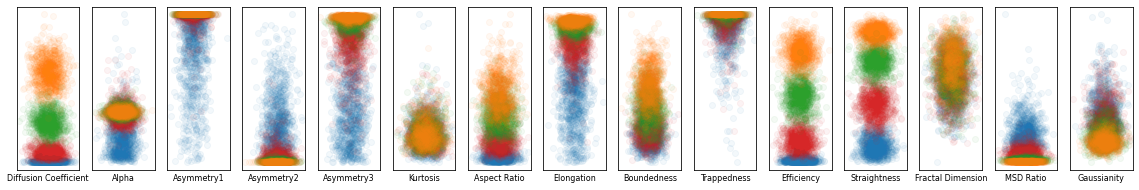

In [51]:
fig, axes = plt.subplots(ncols=15, figsize=(20, 3))

i = 0
for key, ax in zip(ft1, axes):
    #print('{}: {}'.format(key, fts[key].shape))
    noise = np.random.normal(size=1000)
    ax.scatter(noise, ft1[key], alpha=0.05, color='tab:blue')
    
    noise = np.random.normal(size=1000)
    ax.scatter(noise, ft2[key], alpha=0.05, color='tab:red')
    
    noise = np.random.normal(size=1000)
    ax.scatter(noise, ft3[key], alpha=0.05, color='tab:green')
    
    noise = np.random.normal(size=1000)
    ax.scatter(noise, ft4[key], alpha=0.05, color='tab:orange')
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(key, fontsize=8)
    i += 1

In [7]:
xs.shape

(100, 1000)

In [52]:
fts = pd.concat((ft1, ft2, ft3, ft4))

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [46]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    #"Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [59]:
pca = PCA(n_components=16)

In [56]:
scaler = StandardScaler().fit(X)

In [68]:
X, y = fts.to_numpy()[:, :-1], fts.to_numpy()[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

0.958125

In [69]:
for name, clf in zip(names, classifiers):
    pipe = Pipeline([('scaler', StandardScaler()),# ('pca', PCA(n_components=5)),
                 (name, clf)])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    print('{}: {}'.format(name, score))

Nearest Neighbors: 0.9325
Linear SVM: 0.94875
RBF SVM: 0.86875
Decision Tree: 0.95875
Random Forest: 0.9375
Neural Net: 0.95125
AdaBoost: 0.73125
Naive Bayes: 0.93
QDA: 0.885625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [70]:
for name, clf in zip(names, classifiers):
    pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                 (name, clf)])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    print('{}: {}'.format(name, score))

Nearest Neighbors: 0.924375
Linear SVM: 0.93125
RBF SVM: 0.909375
Decision Tree: 0.92375
Random Forest: 0.905
Neural Net: 0.9325
AdaBoost: 0.693125
Naive Bayes: 0.8925
QDA: 0.93


In [49]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

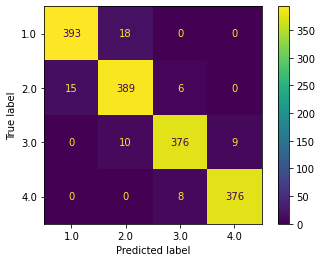

In [50]:
clf = classifiers[3]
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()